<a href="https://colab.research.google.com/github/Kiarendil/ML_FIAN2020_hometasks/blob/master/MLatFIAN2020_seminar01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Titanic dataset:

In [1]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv

--2020-09-14 19:47:24--  https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv [following]
--2020-09-14 19:47:24--  https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.02s   

2020-09-14 19:47:24 (2.71 MB/s) - ‘train.csv’ saved [60302/60302]



In [2]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1

In [31]:
# Compute survaval rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

data.loc[(data['Pclass'] == 1)]['Survived'].mean()

0.6296296296296297

In [32]:
data.loc[(data['Pclass'] == 2)]['Survived'].mean()

0.47282608695652173

In [33]:
data.loc[(data['Pclass'] == 3)]['Survived'].mean()

0.24236252545824846

## Task 2

In [83]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt
import numpy as np
import math

In [85]:
sib_max = np.max(data['SibSp'])
avarage_parents = []

for sib_count in range(0, sib_max + 1):
  print(sib_count)
  av_pr = data.loc[(data['SibSp'] == sib_count)]['Parch'].mean()
  if math.isnan(av_pr):
    av_pr = 0
  print(av_pr)
  avarage_parents.append(av_pr)

0
0.18585526315789475
1
0.6555023923444976
2
0.6428571428571429
3
1.3125
4
1.5
5
2.0
6
0
7
0
8
2.0


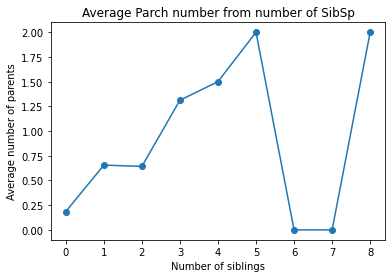

In [90]:
plt.scatter([i for i in range(0, sib_max + 1)], avarage_parents)
plt.plot([i for i in range(0, sib_max + 1)], avarage_parents)

plt.title("Average Parch number from number of SibSp")
plt.xlabel("Number of siblings")
plt.ylabel("Average number of parents");

plt.show()

## Task 3

In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  features = dataset[["Fare", "Parch"]].copy()
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    # <YOUR CODE>
    # E.g.
    n_neighbors=1
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

## Task 4

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [ ]:
from sklearn.model_selection import train_test_split

# <YOUR CODE>